# <center>Machine Learning Model for Loan Prediction</center>

## Table of Contents

1. **[Project Background](#1)**
2. **[About the Data](#2)**
3. **[EDA](#3)**
4. **[Data Cleaning](#4)**
5. **[Model Building and Comparision](#5)**
6. **[Conclusion](#6)**

## Part 1. Project Background <a name= '1'></a>

A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

## Part 2. About the Data  <a name= '2'></a>

### 2.1 Importing libraries and loading data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import time
import warnings
warnings.filterwarnings('ignore')

# Loading dataset
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
predict = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [2]:
# Making a copy of the original data
train_original = train.copy()
predict_original = predict.copy()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
#drop Loan_ID
train = train.drop(['Loan_ID'], axis=1)
predict = predict.drop(['Loan_ID'], axis=1)

### 2.2 Checking missing value

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


## Part 3. EDA  <a name= '3'></a>

### 3.1 Loan Status

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:title={'center':'Loan Status'}>

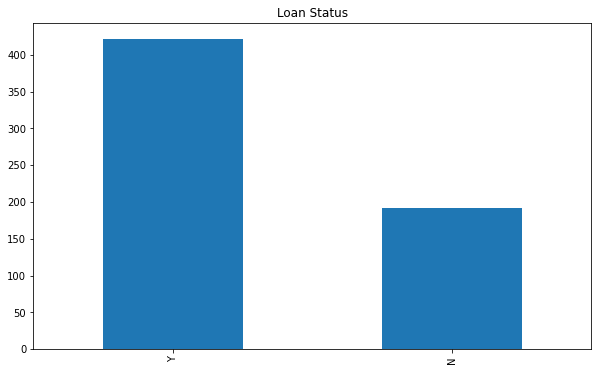

In [10]:
train['Loan_Status'].value_counts().plot.bar(figsize=(10,6), title='Loan Status')

#### Insights 1: The loan of 422(around 69%) people out of 614 was approved.

<AxesSubplot:title={'center':'Credit_History'}>

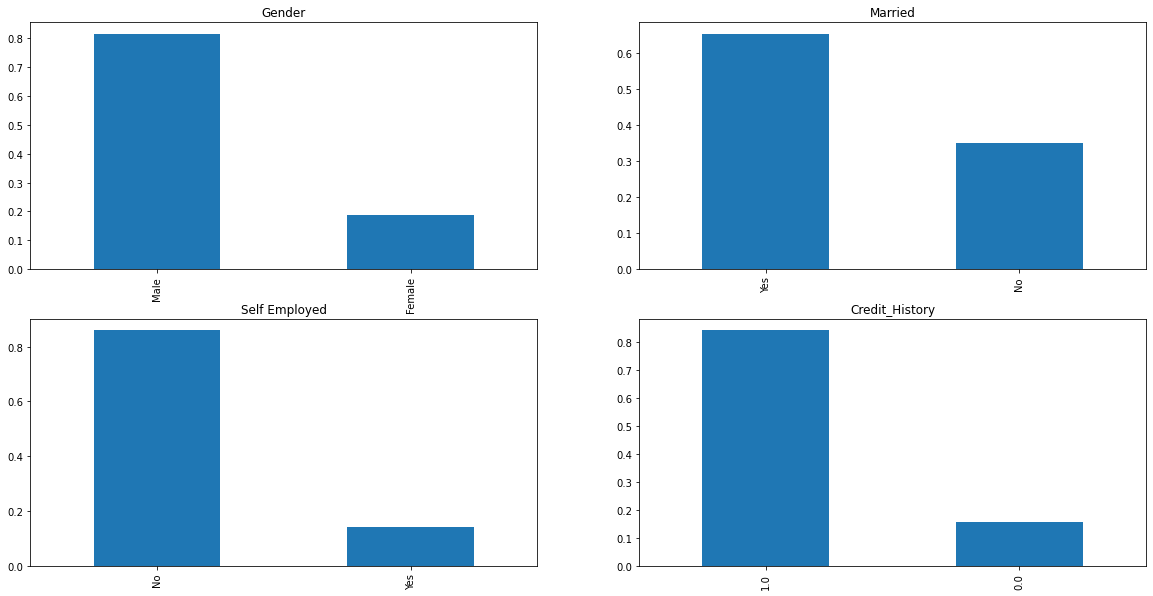

In [11]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

- 80% applicants in the dataset are male.
- Around 65% people are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

<AxesSubplot:title={'center':'Property Area'}>

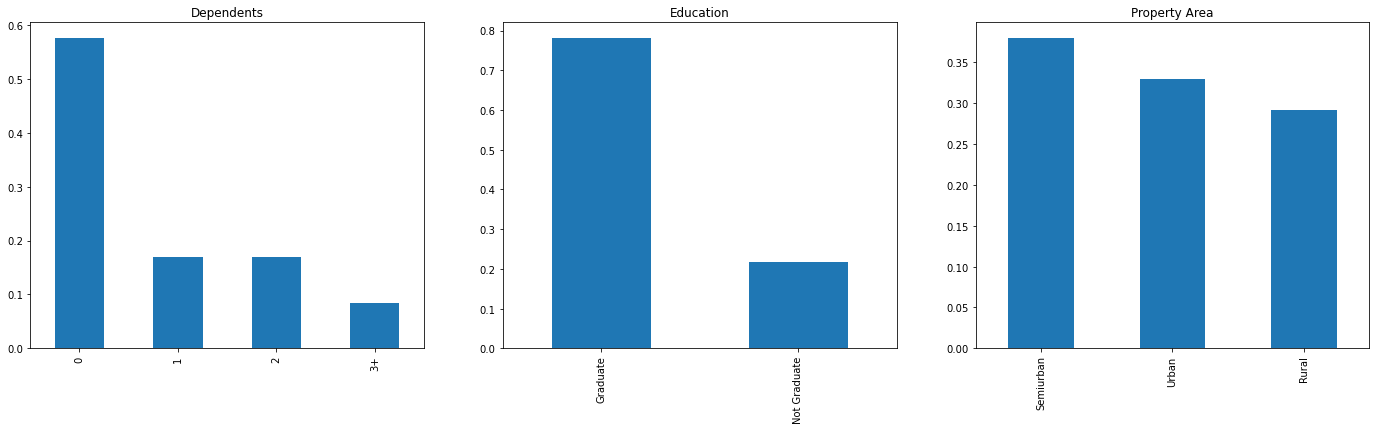

In [12]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')

- Most of the applicants don't have dependents.
- Around 80% of the applicants are graduate.
- Most of the applicants are from Semiurban area.

<AxesSubplot:>

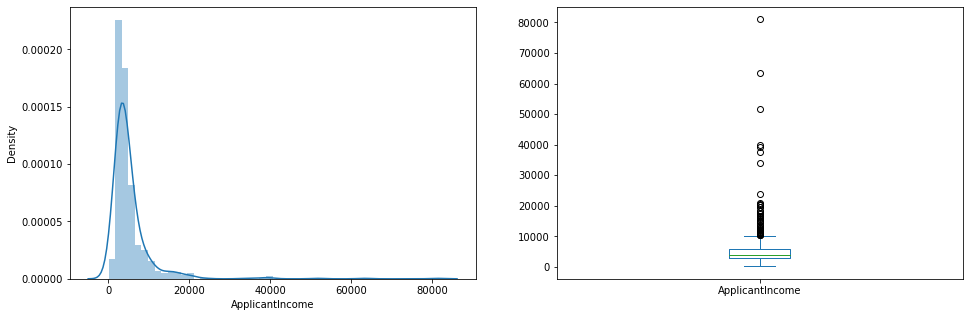

In [13]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

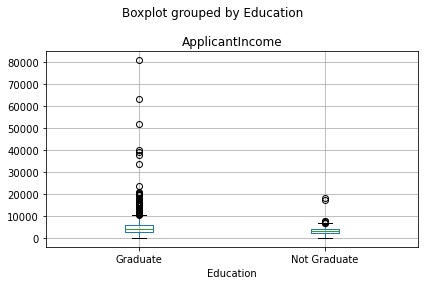

In [14]:
train.boxplot(column= 'ApplicantIncome', by='Education')
plt.tight_layout()

#### Insights 2: There are higher number of graduates with very high incomes which are appearing to be outliers.

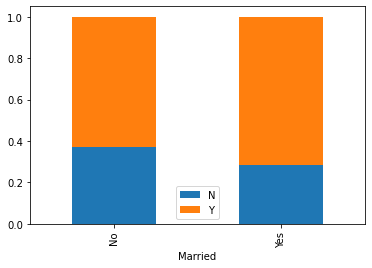

In [15]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

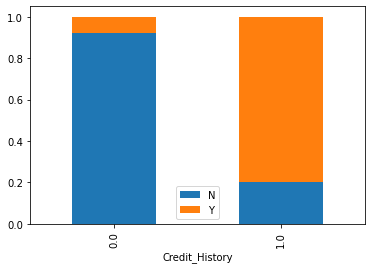

In [16]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

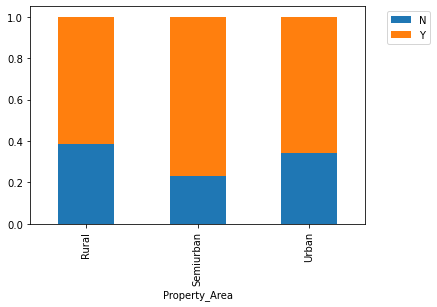

In [17]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

- Proportion of married applicants is higher for the approved loans.
- People with credit history as 1 are more likely to get their loan approved.
- Proportion of loans getting approved in semiurban area is higher compared to rural or urban area.

In [18]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Very High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,High
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,Very High
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,Very High


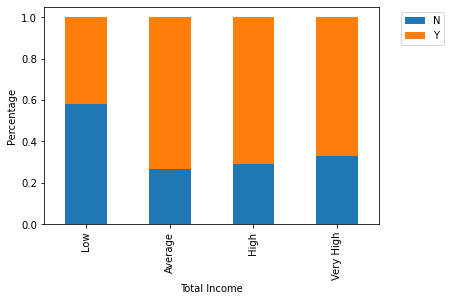

In [19]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

#### Insights 3: Proportions of loan getting approvals for applicants having low Total_Income is very less compared to that of applicants with Average, High and Very High income.

In [20]:
train = train.drop(['Total_Income', 'Total_Income_bin'], axis=1)

In [21]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
train['Dependents'].replace('3+', 3, inplace=True)
predict['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

<AxesSubplot:>

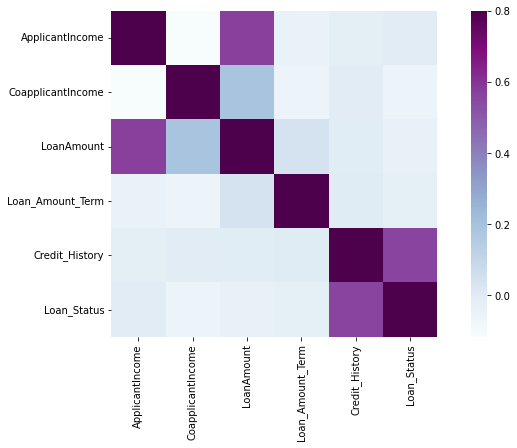

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), vmax=0.8, square=True, cmap='BuPu')

#### Insights 4: We can see that most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

## Part 4. Data Cleaning  <a name= '4'></a>

In [24]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
predict.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [26]:
train_knn = train.copy()
predict_knn = train.copy()

train_xg = train.copy()
predict_xg = train.copy()

#### Mean, Mode, Median

In [27]:
# We impute missing values with mean, mode, median.
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [28]:
predict['Gender'].fillna(predict['Gender'].mode()[0], inplace=True)
predict['Married'].fillna(predict['Married'].mode()[0], inplace=True)
predict['Dependents'].fillna(predict['Dependents'].mode()[0], inplace=True)
predict['Self_Employed'].fillna(predict['Self_Employed'].mode()[0], inplace=True)
predict['Credit_History'].fillna(predict['Credit_History'].mode()[0], inplace=True)
predict['Loan_Amount_Term'].fillna(predict['Loan_Amount_Term'].mode()[0], inplace=True)
predict['LoanAmount'].fillna(predict['LoanAmount'].median(), inplace=True)

In [29]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
predict.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [31]:
t_knn = train.copy()
p_knn = predict.copy()

#### k-Nearest Neighbor Imputation

In [32]:
from sklearn.metrics.pairwise import nan_euclidean_distances
from sklearn.impute import KNNImputer

In [33]:
# mapping
train_knn['Gender'] = train_knn.Gender.map({'Male':1, 'Female':0})
train_knn['Married'] = train_knn.Married.map({'Yes':1, 'No':0})
train_knn['Self_Employed'] = train_knn.Self_Employed.map({'Yes':1, 'No': 0})

predict_knn['Gender'] = predict_knn.Gender.map({'Male':1, 'Female':0})
predict_knn['Married'] = predict_knn.Married.map({'Yes':1, 'No':0})
predict_knn['Self_Employed'] = predict_knn.Self_Employed.map({'Yes':1, 'No': 0})

In [34]:
imputer = KNNImputer(n_neighbors=2)
train_knn_filled = imputer.fit_transform(train_knn[['Gender','Married','Dependents','Self_Employed','LoanAmount',
                                                    'Loan_Amount_Term', 'Credit_History']])
predict_knn_filled = imputer.fit_transform(predict_knn[['Gender','Dependents','Self_Employed','LoanAmount',
                                                    'Loan_Amount_Term', 'Credit_History']])

In [35]:
train_knn_filled = pd.DataFrame(train_knn_filled, columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
predict_knn_filled = pd.DataFrame(predict_knn_filled, columns = ['Gender', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

In [36]:
columns_to_replace = ['Gender', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

t_knn[columns_to_replace] = train_knn_filled[columns_to_replace]
t_knn['Married'] = train_knn_filled['Married']

p_knn[columns_to_replace] = predict_knn_filled[columns_to_replace]

## Part 5. Model Building  <a name= '5'></a>

### 5.1 Data prep

#### 5.1.1 Assign X and y

In [37]:
#Put feature variable to X and response variable to y
X = train.drop(['Loan_Status'], axis = 1)
y = train['Loan_Status']

#### 5.1.2 One-Hot Encoding

In [38]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)
predict = pd.get_dummies(predict)

In [39]:
#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
X_train.shape, X_test.shape

((429, 20), (185, 20))

### 5.2 Decision Tree

In [40]:
model = DecisionTreeClassifier(random_state=1)

In [41]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [42]:
predictions = model.predict(X_test)

In [43]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57        61
           1       0.79      0.78      0.79       124

   micro avg       0.71      0.71      0.71       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.71      0.71      0.71       185
 samples avg       0.71      0.71      0.71       185



In [44]:
print(accuracy_score(y_test, predictions))

0.7135135135135136


### 5.3 Random Forest

In [45]:
classifier_rf = RandomForestClassifier(
    random_state=4,
    n_jobs=-1,
    max_depth=3,
    n_estimators=3,
    min_samples_leaf=2,
    oob_score=True)

In [46]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 22.5 ms, sys: 33.6 ms, total: 56.1 ms
Wall time: 85.6 ms


RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=3,
                       n_jobs=-1, oob_score=True, random_state=4)

#### 5.3.1 Grid Search

In [47]:
rf = RandomForestClassifier(random_state=4, n_jobs=-1)

In [48]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [2,3,5,10],
    'n_estimators': [100,200,300,500]
}

grid_search = GridSearchCV(estimator=rf,
                          param_grid=params,
                          cv=4,
                          n_jobs=-1,verbose=1,scoring='accuracy')

In [49]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits
CPU times: user 804 ms, sys: 321 ms, total: 1.12 s
Wall time: 20.4 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=4),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [2, 3, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy', verbose=1)

In [50]:
grid_search.best_score_

0.8204828660436136

In [51]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=500,
                       n_jobs=-1, random_state=4)

In [52]:
%%time
rf_best.fit(X_train, y_train)

CPU times: user 479 ms, sys: 178 ms, total: 657 ms
Wall time: 479 ms


RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=500,
                       n_jobs=-1, random_state=4)

#### 5.3.2 Model Fitting and Accuracy

In [53]:
model = rf_best.fit(X_train, y_train)

In [54]:
predictions = rf_best.predict(X_test)

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.39      0.55        61
           1       0.77      0.98      0.86       124

   micro avg       0.78      0.78      0.78       185
   macro avg       0.83      0.68      0.70       185
weighted avg       0.81      0.78      0.76       185
 samples avg       0.78      0.78      0.78       185



In [56]:
print(accuracy_score(y_test, predictions))

0.7837837837837838


#### 5.3.3 Feature Importance

In [57]:
rf_best.feature_importances_

array([0.10515861, 0.06653788, 0.09192051, 0.03953248, 0.48877027,
       0.00516529, 0.00695668, 0.01558767, 0.01615825, 0.01024759,
       0.01203123, 0.01047916, 0.01065948, 0.01482929, 0.0142139 ,
       0.00872232, 0.00780936, 0.0194632 , 0.0430286 , 0.01272823])

In [58]:
imp_df = pd.DataFrame({
    'Varname': X_train.columns,
    'imp': rf_best.feature_importances_
})

imp_df.sort_values(by='imp', ascending=False)

,Varname,imp
4,Credit_History,0.488770
0,ApplicantIncome,0.105159
2,LoanAmount,0.091921
1,CoapplicantIncome,0.066538
18,Property_Area_Semiurban,0.043029
3,Loan_Amount_Term,0.039532
17,Property_Area_Rural,0.019463
8,Married_Yes,0.016158
7,Married_No,0.015588
13,Education_Graduate,0.014829


**Insights:**

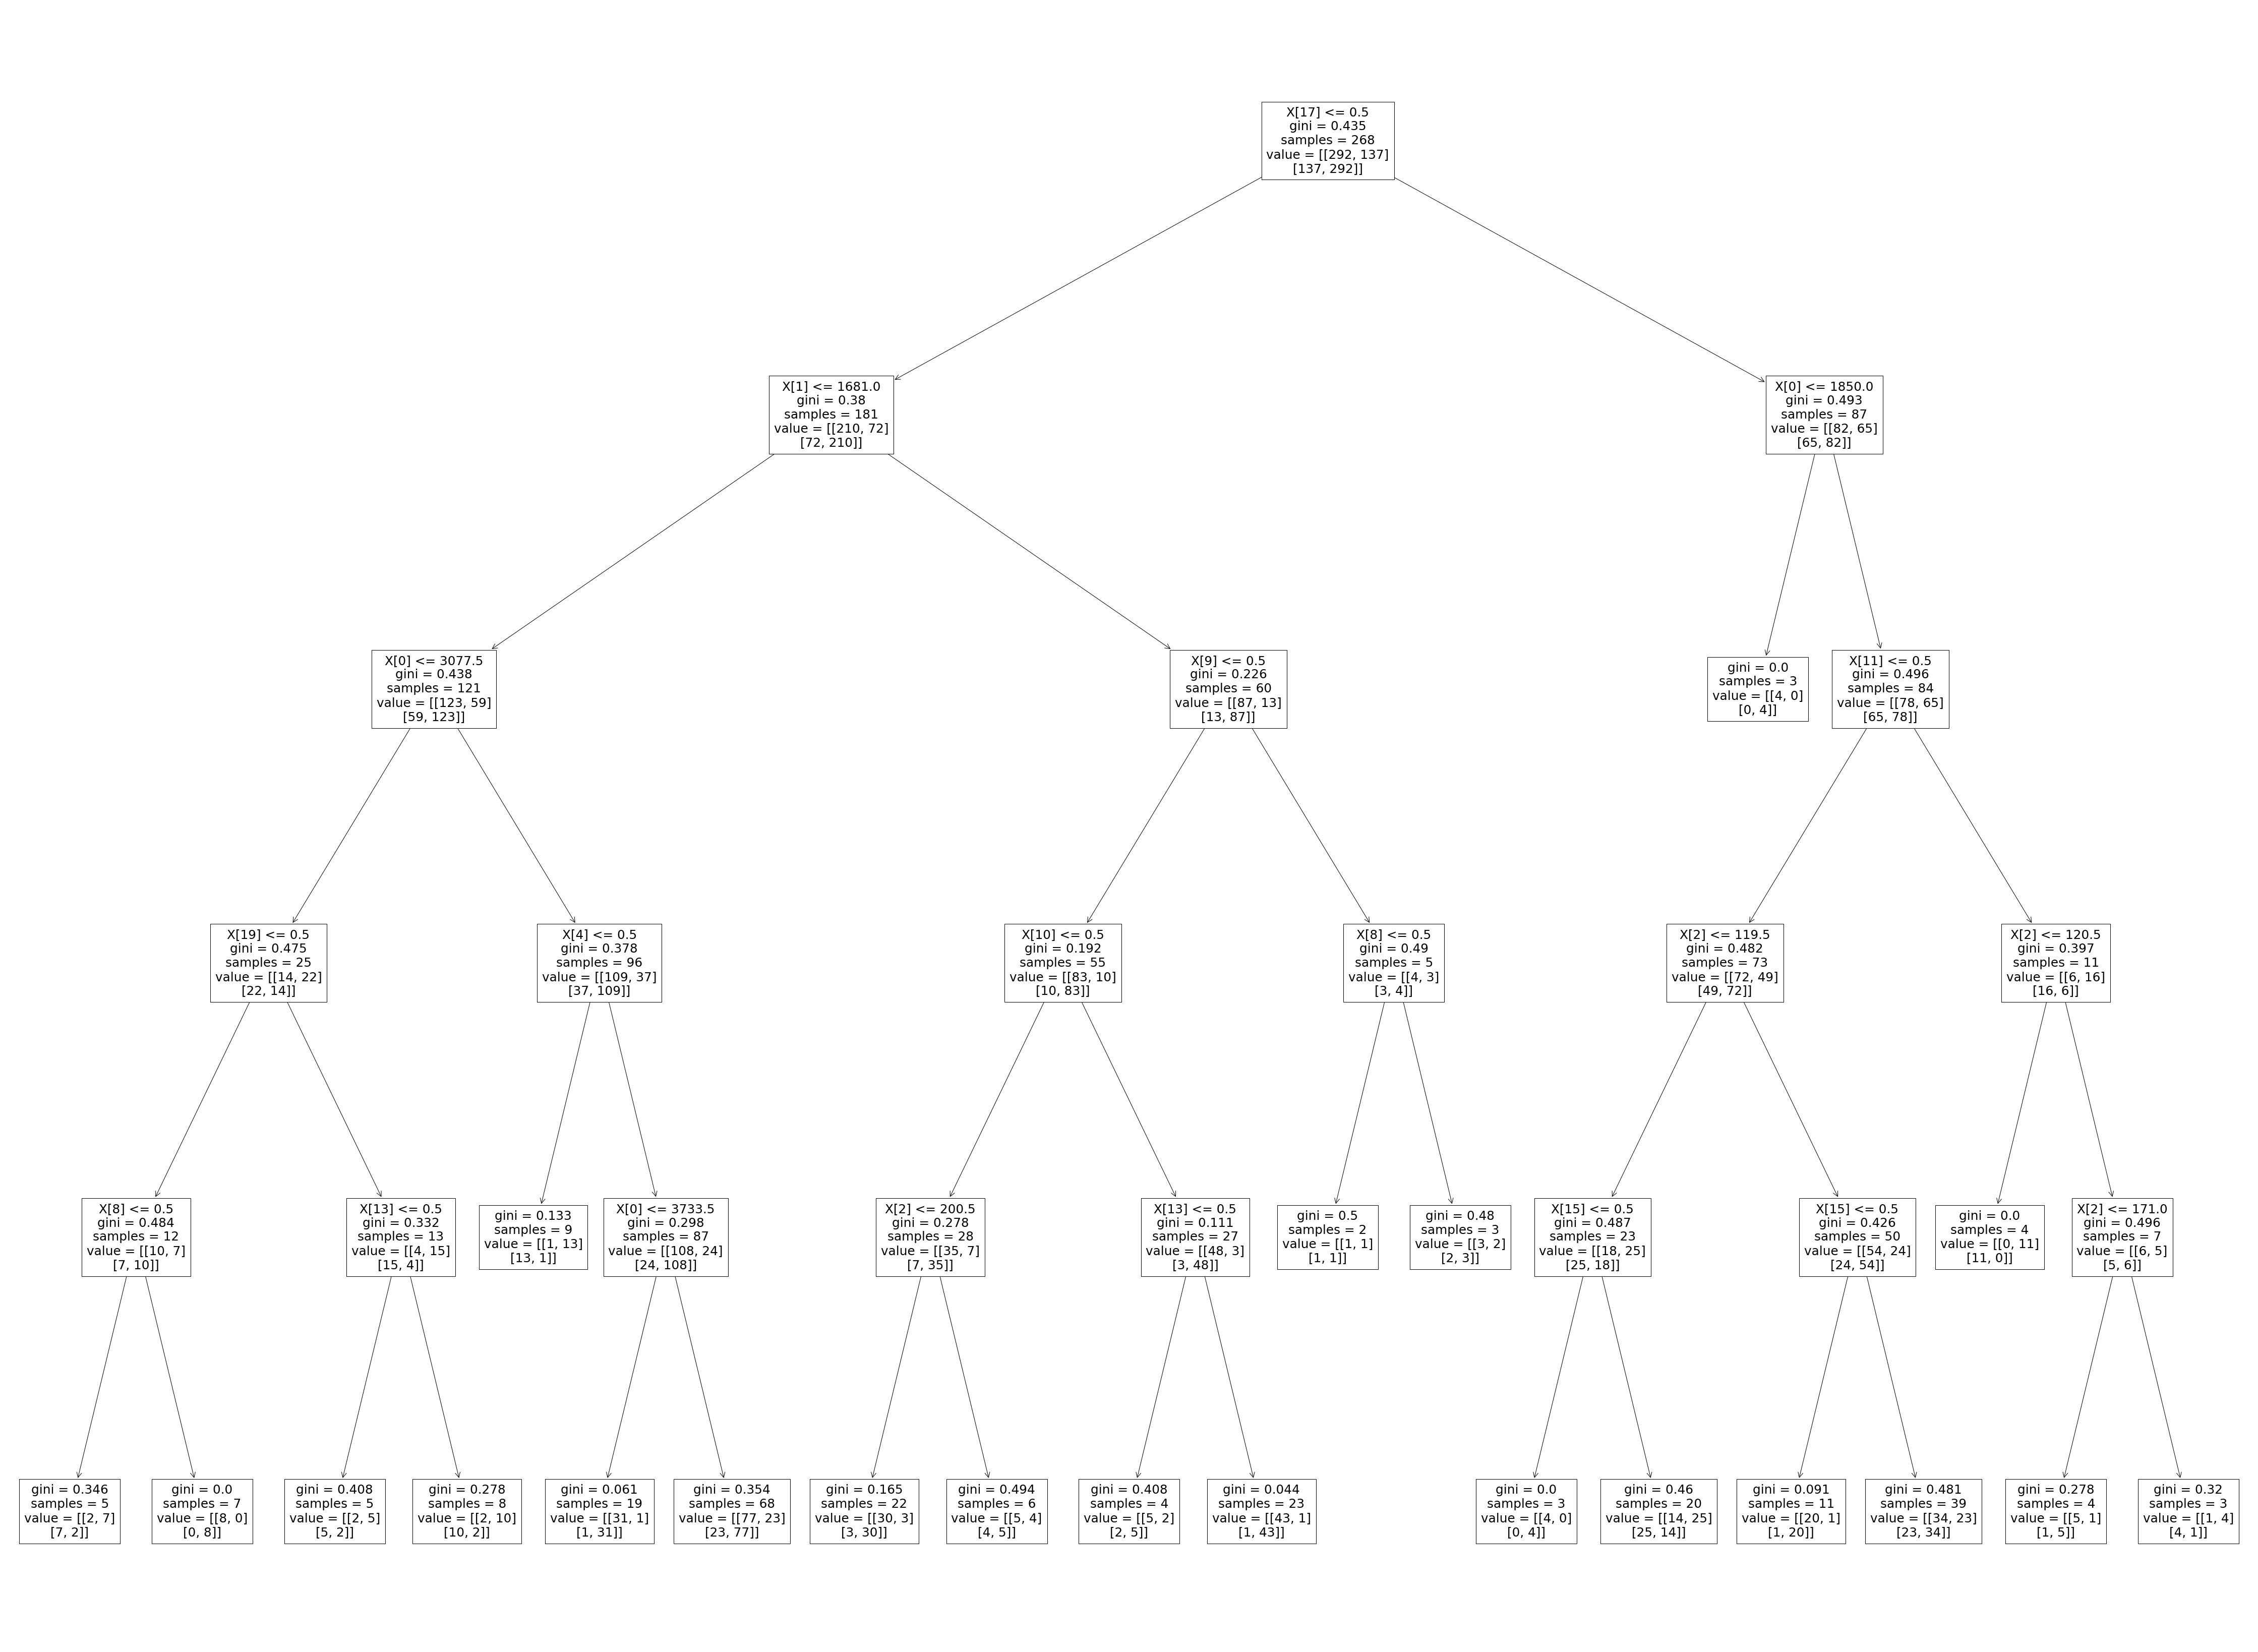

In [59]:
#Plot of the first estimator in the random forest
from sklearn import tree
plt.figure(figsize=(80, 60))
tree.plot_tree(rf_best.estimators_[0])
plt.show()

### 5.4 XGboost

#### 5.4.1 XGboost Data Prep

In [60]:
#Put feature variable to X and response variable to y, XGboost will handle missing values itself
X = train_xg.drop(['Loan_Status'], axis = 1)
y = train_xg['Loan_Status']

In [61]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)
predict = pd.get_dummies(predict_xg)

In [62]:
#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 2)
X_train.shape, X_test.shape

((429, 20), (185, 20))

In [63]:
#Convert data to DMatrix format
Dtrain = xgb.DMatrix(X_train, label=y_train)
Dtest = xgb.DMatrix(X_test, label=y_test)

#### 5.4.2 Model Fitting and Accuracy

In [64]:
model = xgb.XGBClassifier(objective='binary:logistic')
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7675675675675676
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.53      0.59        58
           1       0.80      0.87      0.84       127

   micro avg       0.77      0.77      0.77       185
   macro avg       0.73      0.70      0.71       185
weighted avg       0.76      0.77      0.76       185
 samples avg       0.77      0.77      0.77       185



#### 5.4.3 Parameters Tuning

In [65]:
param_grid = {
    'max_depth': [3,6,9,12],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

model = xgb.XGBClassifier(objective='binary:logistic')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.001, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.9}
Best Score: 0.8158508158508159


In [66]:
#After tuning
final_model = xgb.XGBClassifier(
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    objective='binary:logistic'
)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Final Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Final Model Accuracy: 0.7783783783783784
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.40      0.53        58
           1       0.78      0.95      0.86       127

   micro avg       0.78      0.78      0.78       185
   macro avg       0.80      0.67      0.70       185
weighted avg       0.79      0.78      0.75       185
 samples avg       0.78      0.78      0.78       185



#### 5.4.4 Feature Importance

In [67]:
feature_importances = final_model.feature_importances_

In [69]:
imp_df = pd.DataFrame({
    'Varname': X_train.columns,
    'imp': final_model.feature_importances_
})

imp_df.sort_values(by='imp', ascending=False)

,Varname,imp
4,Credit_History,0.708209
3,Loan_Amount_Term,0.038479
7,Married_No,0.023372
8,Married_Yes,0.020701
2,LoanAmount,0.019183
11,Dependents_1,0.017175
0,ApplicantIncome,0.016146
1,CoapplicantIncome,0.015409
17,Property_Area_Rural,0.014684
10,Dependents_0,0.014001
